In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

groundTruth_Users = os.listdir("groundTruth")
MyoData_Users = os.listdir("MyoData")
groundTruth_Users.sort()
MyoData_Users.sort()

user_id = []
for i in range(len(MyoData_Users)):
    if MyoData_Users[i] == groundTruth_Users[i]:
        user_id.append(MyoData_Users[i])

In [2]:
def get_paths(user, fork_or_spoon= 'fork'):
    parent_path = "clean_data/" + user + '/' + fork_or_spoon
    dir_list = os.listdir(parent_path)
    EMG_eating_txt_path = parent_path + "/" + dir_list[0]
    EMG_not_eating_txt_path = parent_path + "/" + dir_list[1]
    IMU_eating_txt_path = parent_path + "/" + dir_list[2]
    IMU_not_eating_txt_path = parent_path + "/" + dir_list[3]
    master_EMG_path = parent_path + "/" + dir_list[4]
    master_IMU_path = parent_path + "/" + dir_list[5]
    
    return (EMG_eating_txt_path, EMG_not_eating_txt_path, IMU_eating_txt_path, IMU_not_eating_txt_path, master_EMG_path, master_IMU_path)

def get_dataframe(user = "user09", data_for="EMG", fork_or_spoon="fork", eating=True, master=False):
    paths = get_paths(user, fork_or_spoon)
    if data_for == "EMG":
        if master:
            return pd.read_csv(paths[4], sep=",", index_col=0)
        elif eating:
            return pd.read_csv(paths[0], sep=",", index_col=0)
        else:
            return pd.read_csv(paths[1], sep=",", index_col=0)

    elif( data_for == "IMU"):
        if master:
            return pd.read_csv(paths[5], sep=",", index_col=0)
        elif eating:
            return pd.read_csv(paths[2], sep=",", index_col=0)
        else:
            return pd.read_csv(paths[3], sep=",", index_col=0)
    

In [3]:
for user in user_id:
    
    try:
        df = get_dataframe(user, data_for="EMG", fork_or_spoon="fork", eating=True, master=True)
    except:
        print(user)
#df.reset_index(drop=True) 
#df


In [136]:
from scipy import fftpack
df = get_dataframe("user11", data_for="EMG", fork_or_spoon="fork", eating=True, master=False)
df.reset_index(drop=True,inplace=True)

,UNIX time stamp,EMG 1,EMG 2,EMG 3,EMG 4,EMG 5,EMG 6,EMG 7,EMG 8,eating
0,1503513667722,-4,-15,-13,11,14,-4,-2,-31,True
1,1503513667736,16,25,25,-1,-9,-13,-3,12,True
2,1503513667747,-20,-1,4,-5,-9,-6,-5,4,True
3,1503513667751,8,1,-8,2,0,-7,-1,12,True
4,1503513667766,0,4,11,10,5,-2,1,2,True


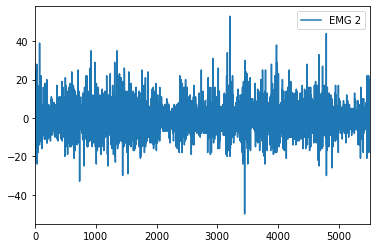

In [137]:
df.plot(y=2)
df.head()

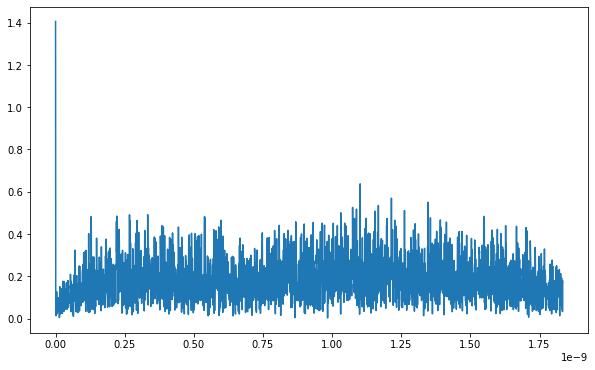

In [132]:
y = df['EMG 1'].tolist()
x = df['UNIX time stamp'].tolist()
len(x)

# apply fft function
#yf = fftpack.fft(y, len(x))

#amp = np.abs(yf) # get amplitude spectrum 
#freq = np.linspace(0.0, 1.0/(2.0*(x[-1]/len(x))), len(x)//2) # get freq axis

yf = fftpack.fft(y, len(x))
amp = np.abs(yf) # get amplitude spectrum 
freq = fftpack.fftfreq(len(x), x[-1]/len(x))
plt.figure(figsize=(10,6))
plt.plot(freq[0:freq.size//2], (2/amp.size)*amp[0:amp.size//2])
plt.show()

#plt.plot(x,y)
#df.reset_index(drop=True).plot(y=1)

In [51]:
df2 = get_dataframe("user09", data_for="EMG", fork_or_spoon="fork", eating=False, master=False)
df2['EMG 1'].array
x

<bound method IndexOpsMixin.to_numpy of RangeIndex(start=0, stop=2896, step=1)>

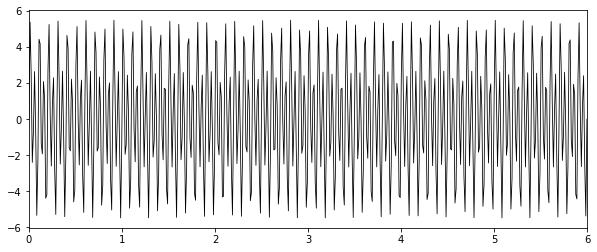

In [98]:
# sampling freq in herts 20Hz, and 40Hz
freq_sampling1 = 10
freq_sampling2 = 20
amplitude1 = 2 # amplitude of first sine wave
amplitude2 = 4 # amplitude of second sine wave
time = np.linspace(0, 6, 500, endpoint=True) # time range with total samples of 500 from 0 to 6 with time interval equals 6/500
y = amplitude1*np.sin(2*np.pi*freq_sampling1*time) + amplitude2*np.sin(2*np.pi*freq_sampling2*time)

plt.figure(figsize=(10, 4))
plt.plot(time,y, 'k', lw=0.8)
plt.xlim(0,6)
plt.show()

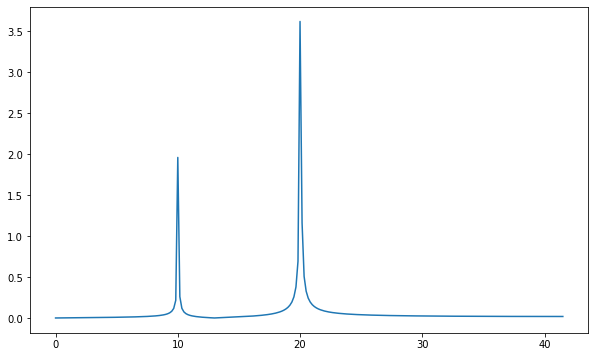

In [99]:
# apply fft function
# yf = fftpack.fft(y, time.size)

# amp = np.abs(yf) # get amplitude spectrum 
# freq = np.linspace(0.0, 1.0/(2.0*(6/500)), time.size//2) # get freq axis

# # plot the amp spectrum

# plt.figure(figsize=(10,6))
# plt.plot(freq, (2/amp.size)*amp[0:amp.size//2])
# plt.show()


yf = fftpack.fft(y, time.size)
amp = np.abs(yf) # get amplitude spectrum 
freq = fftpack.fftfreq(time.size, 6/500)
plt.figure(figsize=(10,6))
plt.plot(freq[0:freq.size//2], (2/amp.size)*amp[0:amp.size//2])
plt.show()

In [ ]:
np.average(diff_array),np.average(diff_EMG),np.average(diff_IMU)

In [ ]:
IMU_col = ['UNIX time stamp', 'Orientation X', 'Orientation Y', 'Orientation Z', 'Orientation W', 'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X', 'Gyroscope Y','Gyroscope Z'] 
for col in IMU_col:
    if col == IMU_col[0]:
        continue
    df_IMU.plot(x=IMU_col[0],y=col)

In [ ]:
EMG_col = ['UNIX time stamp', 'EMG 1', 'EMG 2', 'EMG 3', 'EMG 4', 'EMG 5', 'EMG 6', 'EMG 7', 'EMG 8']
for col in EMG_col:
    if col == EMG_col[0]:
        continue
    df_EMG.plot(x=EMG_col[0],y=col)